# Logistic Regression

**Author: Khal Makhoul, W.P.G.Peterson**

**_Revised: Jessica Cervi_**

**Expected time = 2.5 hours**

**Total points = 80 points**
 
 
 
## Assignment Overview


Logistic regression offers a way to create a fairly interpretable parametric model for binary classification. This assignment will work through the definition of a logistic regression function in Python. After summarizing the equations and a brief EDA of the 'Titanic' data that we will be using, you will be asked to define many functions that will create a logistic regression.  
A demonstration of sklearn's implementation of Logistic Regression will close the assignment.


You will be asked to code functions to do the following:
1. Implement the Logistic Regression Algorithm
    - Calculate the value of the sigmoid function
    - Calculate the gradient of the log-likelihood with respect to $w$
    - Sum the gradients of the log-likelihood with respect to $w$
2. Execute logistic regression, stopping after a particular iteration
3. Determine convergence of the logistic regression algorithm

This assignment is designed to build your familiarity and comfort in coding in Python. It will also help you review the key topics from each module. As you progress through the assignment, answers to the questions will get increasingly complex. You must adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and giving you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless asked specifically. This will cause an error in Vocareum.
- Do not use a library unless you are explicitly asked in the question. 
- You can download the Grading Report after submitting the assignment. It will include the feedback and hints on incorrect questions. 


### Learning Objectives


- Count the null values 
- Examine the auto coorrelation features 
- Ensure the correct orientation of the feature matrix 
- Implement the logistic function 
- Update the coefficient/weights using the gradient descent  
- Examine the predicted probabilities using the logistic regression  
- Implement the logistic regression with sklearn



## Index: 

#### Logistic Regression

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)





**Problem**: Using Logistic Regression, predict whether or not a passenger survived the sinking of the Titanic.

**Data**: Today's data comes from [Kaggle's Titanic Data](https://www.kaggle.com/c/titanic/data). Please see the above link for the complete description of the data.


# Logistic Regression


In this week's lectures, we derived all the equations that we will use in this assignment.  

Recall that the likelihood for Logistic Regression is given by:

$$p(y_1,\ ...,\ y_n\ |\ x_1,\ ...,\ x_n,\ w)\ =\prod\limits_{i=1}^n\ \sigma_i(y_i \cdot w)$$  

For coding purposes, we need the expression for the gradient of the log-likelihood $\mathcal{L}$ with respect to $w$:


$$\nabla_w \mathcal{L} = \sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w))\ y_i x_i$$  

Where: $$\sigma_i(y_i \cdot w) = \frac{e^{y_iX_i^Tw}}{1+e^{y_ix_i^Tw}}$$  

The steps for implementing the logistic regression is explained at the beginning of each of the following questions.

### Importing the dataset and exploratory data analysis


This assignment will analyze data from [Titanic passenger manifest](https://www.kaggle.com/c/titanic/data). Our goal will be to analyze the demographic and trip information for each passenger to understand whether they have survived or not the disaster.

We start by examining the data as usual:
Before coding an algorithm, we will take a look at our data using Python's pandas. For visualizations, we will use matplotlib.

To import the necessary libraries and load the datasets, we will be using the pandas' 'pd.read_csv()' function. 

In [1]:
# Import the necessary modules

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Load the data into a `pandas` DataFrame object
titanic_df = pd.read_csv('./data/train.csv')



We begin by performing some basic exploratory data analysis by using the function `head()` .

In [6]:
# Examine head of df
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*
 
When deciding whether we want to drop a column in a DataFrame, some general rules are as follows:

- If a column consists mostly of missing data, that column probably will not be of much use in prediction.  
- If a column has a very few missing values, and there enough records to build a model, the records with missing values in that column may be cast out.  

Drop all of the columns in 'titanic_df' that are filled with more than 50% nulls. Next, if a column has less than 10 missing values, drop all of the records with missing data in that column.

After performing the above operations, what is the shape of the DataFrame? We assign integers to the variables 'row' and 'cols' below corresponding to the *remaining* number of rows/columns in the data frame.

In [2]:
### GRADED


### YOUR ANSWER BELOW
rows = 889
cols = 11

###
### YOUR CODE HERE
###

# print(titanic_df.shape)
# titanic_df = titanic_df.drop(['Cabin' ], axis=1)
# print(titanic_df.isna().sum())
# titanic_df = titanic_df.dropna(how='any', subset=['Embarked'])
# titanic_df.shape

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*5 points*

How many values are missing from the column "Age" ? Assign your answer to the variable "ans2" as an integer.

In [21]:
### GRADED

### YOUR ANSWER BELOW

ans2 = 177

###
### YOUR CODE HERE
###

#titanic_df['Age'].isna().sum()

In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Given:
- The large number of values missing in the column 'Age'
- The age of a passenger is likely connected with the chances of survival of the passenger

In such a case, we will create an educated guess for the missing missing values of the passengers' ages. In other words, we will impute the ages using the $k$-Nearest-Neighbor (KNN) algorithm.

Note: In imputing values for 'Age', we will exclude the feature 'Survived' from the matrix $X$, because we want to predict the chances of survival of each passenger.

#### KNeighborsRegressor in "sklearn"
It is necessary to encode any categorical features that we will be using as dummy variables because 'sklearn' automatically converts all data to floats before fitting the models. 

We begin by dropping irrelevant features, such as 'Ticket', 'Cabin', 'PassengerId', and 'Name', from the data frame. We also drop the 'Survived' column for the reason we just explained.

In [26]:
titanic_df.drop(['Ticket','Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)
titanic_df = titanic_df.loc[titanic_df['Embarked'].notnull(),:]

### Drop "Survived" for purposes of KNN imputation:
y_target = titanic_df.Survived
titanic_knn = titanic_df.drop(['Survived'], axis = 1)  
titanic_knn.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Next, we use the function "get_dummies()" on the columns "Sex" and "Embarked".

In [27]:
### Adding the dummy variables for categorical variables
to_dummy = ['Sex','Embarked']
titanic_knn = pd.get_dummies(titanic_knn, prefix = to_dummy, columns = to_dummy, drop_first = True)

titanic_knn.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


Finally, we will follow the same steps as we did in Assignment 16. We split the data and make a prediction about the missing values using the KNN algorithm.

The code is given in the code cell below.

In [29]:
### Splitting data - on whether or not "Age" is specified.

# Training data -- "Age" Not null; "Age" as target
train = titanic_knn[titanic_knn.Age.notnull()]
X_train = train.drop(['Age'], axis = 1)
y_train = train.Age


# Data to impute, -- Where Age is null; Remove completely-null "Age" column.
impute = titanic_knn[titanic_knn.Age.isnull()].drop(['Age'], axis = 1)
print("Data to Impute")
print(impute.head(3))

# import algorithm
from sklearn.neighbors import KNeighborsRegressor

# Instantiate
knr = KNeighborsRegressor()

# Fit
knr.fit(X_train, y_train)

# Create Predictions
imputed_ages = knr.predict(impute)

# Add to Df
impute['Age'] = imputed_ages
print("\nImputed Ages")
print(impute.head(3))

# Re-combine data frames
titanic_imputed = pd.concat([train, impute], sort = False, axis = 0)

# Return to original order - to match back up with "Survived"
titanic_imputed.sort_index(inplace = True)
print("Shape before imputation:", titanic_knn.shape)
print("Shape with imputed values:", titanic_imputed.shape)
titanic_imputed.head(7)

Data to Impute
    Pclass  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
5        3      0      0   8.4583         1           1           0
17       2      0      0  13.0000         1           0           1
19       3      0      0   7.2250         0           0           0

Imputed Ages
    Pclass  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S   Age
5        3      0      0   8.4583         1           1           0  47.2
17       2      0      0  13.0000         1           0           1  25.6
19       3      0      0   7.2250         0           0           0  23.0
Shape before imputation: (889, 8)
Shape with imputed values: (889, 8)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
5,3,47.2,0,0,8.4583,1,1,0
6,1,54.0,0,0,51.8625,1,0,1


#### Exploratory data analysis

Now that we have prepared our data, we can look at the categorical features in the table above. This will be useful to tune our algorithm and decide whether our solution is correct or not.

In [30]:
import itertools

# Lists of categorical vs. numeric features
categorical = ['Pclass','Sex','Embarked']
numeric = ['Age','SibSp','Parch','Fare']

# Create all the pairs of categorical variables and look at the distributions
cat_combos = list(itertools.combinations(categorical, 2))
print("All combinations of categorical variables: \n",cat_combos, "\n")
for row, col in cat_combos:
    print("Row Percents: \n",pd.crosstab(titanic_df[row], titanic_df[col], normalize="index"), "\n")
    print("Column Percents: \n", pd.crosstab(titanic_df[row], titanic_df[col], normalize="columns"),"\n---------------\n")

All combinations of categorical variables: 
 [('Pclass', 'Sex'), ('Pclass', 'Embarked'), ('Sex', 'Embarked')] 

Row Percents: 
 Sex       female      male
Pclass                    
1       0.429907  0.570093
2       0.413043  0.586957
3       0.293279  0.706721 

Column Percents: 
 Sex       female      male
Pclass                    
1       0.294872  0.211438
2       0.243590  0.187175
3       0.461538  0.601386 
---------------

Row Percents: 
 Embarked         C         Q         S
Pclass                                
1         0.397196  0.009346  0.593458
2         0.092391  0.016304  0.891304
3         0.134420  0.146640  0.718941 

Column Percents: 
 Embarked         C         Q         S
Pclass                                
1         0.505952  0.025974  0.197205
2         0.101190  0.038961  0.254658
3         0.392857  0.935065  0.548137 
---------------

Row Percents: 
 Embarked         C         Q         S
Sex                                   
female    0.233974  0.11

For the numeric variables, we have created a correlation heatmap using the function "heatmap" in the "seaborn" plotting package.

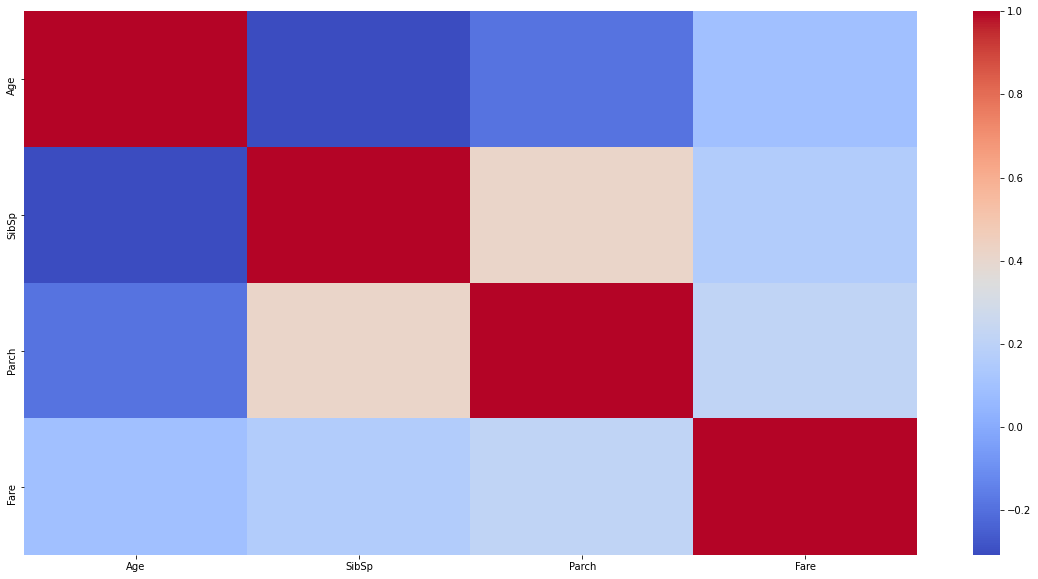

In [31]:
import seaborn as sns
sns.heatmap(titanic_df[numeric].corr(), cmap = "coolwarm");

[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*5 points*

Decide whether the following statement is True or False.

"Aside from autocorrelation, two of the above variables in the heatmap have a correlation that is greater than 0.5." Assign your answer as a boolean value 'ans3'.

In [32]:
### GRADED
### YOUR ANSWER BELOW

ans3 = False
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "code"></a>
## Coding Logistic Regression


[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*10 points*

The first function we will be coding will perform the pre-processing of our data. 

Define a function called 'prepare_data' that takes arguments as- "numpy" arrays "input_x" and "target_y".
Your function should perform the following steps:

1. Ensure that the 'input_x' and 'target_y' arrays have the observations as rows, and features as columns. In particular:
    - 'input_x' should be a matrix with $n$ rows and $d$ columns. Where $n>d$
    - 'target_y' should be a one-dimensional numpy array of length $n$.  

2. A column of ones must be added to "input_x" matrix, increasing its dimensions to $ n \times d+1$.  

3. Ensure that "target_y" has all values encoded as 1 and -1, **not** 1 and 0.  

4. The initial  weights must be created as a zero vector of length $d+1$ (Hint: look at the function 'np.zeros')

Your function should return three arrays 'return prepared_x', 'prepared_y', 'initial_w', each created using the above steps.


In [33]:
### GRADED


### YOUR ANSWER BELOW

def prepare_data(input_x, target_y):
    """
    Confirm dimensions of x and y, transpose if appropriate;
    Add column of ones to x;
    Ensure y consists of 1's and -1's;
    Create weights' array of all 0s
    
    Return X, y, and weights.
    
    Arguments:
        input_x - a numpy array 
        target_y - a numpy array
        
    Returns:
        prepared_x -- a 2-d numpy array; first column consists of 1's,
            more rows than columns
        prepared_y -- a numpy array consisting only of 1s and -1s
        initial_w -- a 1-d numpy array consisting of "d+1" 0s, where
            "d+1" is the number of columns in "prepared_x"
        
    Example:
        x = np.array([[1,2,3,4],[11,12,13,14]])
        y = np.array([1,0,1,1])
        x,y,w = prepare_data(x,y)
        
        print(x) #--> array([[ 1,  1, 11],
                            [ 1,  2, 12],
                            [ 1,  3, 13],
                            [ 1,  4, 14]])
                            
        print(y) #--> array([1, -1, 1, 1])
        
        print(w) #--> array([0., 0., 0.])
        
    Assumptions:
        Assume that there are more observations than features in `input_x`
    """  
    # Ensure shape of x-array
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
    # Check size of y array, if necessary reshape to -1
    
    if len(target_y.shape) > 1:
        if min(target_y.shape) == 1:
            target_y.reshape(-1)
        else:
            print("Bad Y")
        
    # Create column of ones
    ones = np.ones((input_x.shape[0],1), dtype = int)
    
    # prepend column of ones
    augmented_x = np.concatenate((ones,input_x), axis = 1)
    
    # Ensure target is all -1 and 1
    target_y = np.array([x if x ==1 else -1 for x in target_y])
    
    # Create initial weights of 0s
    init_w = np.zeros(augmented_x.shape[1])
    
    # Return three numpy arrays
    return augmented_x, target_y, init_w
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*10 points*

Next, we will define a function to calculate the value of the sigmoid. 

Recall that the equation for the sigmoid is given by:

$$\sigma_i(y_i \cdot w) = \frac{e^{y_iX_i^Tw}}{1+e^{y_ix_i^Tw}}$$  

Define a function called 'sigmoid_single' that takes the arguments- the arrays $x_i$, $y_i$, and $w$.

It returns the sigmoid, as a float, with a value between 0 and 1.  

**Note that $e^{y_ix_i^Tw}$ will evaluate to $np.inf$ if $y_ix_i^Tw$ is greater than ~709.782. In this case, a "1" should be returned by the function.**

In [34]:
### GRADED


### YOUR ANSWER BELOW
def sigmoid_single(x, y, w):
    """
    Obtain the value of a Sigmoid using the training data.
    
    Arguments:
        x - a vector of length d
        y - either 1, or -1
        w - a vector of length d
    
    Example:
        x = np.array([23.0,75])
        y = -1
        w = np.array([2,-.5])
        sig = sigmoid_single(x, y, w)
        
        print(sig) #--> 0.0002034269780552065
        
        x2 = np.array([ 1. , 22., 0. , 1. , 7.25 , 0. , 3. , 1. , 1.])
        w2 = np.array([ -10.45 , -376.7215 , -0.85, -10.5 , 212.425475 , -1.1, -36.25 , -17.95 , -7.1])
        y2 = -1
        sig2 = sigmoid_single(x2,y2,w2)
        
        print(sig2) #--> 1
    """
    
    exponent = y*np.matmul(x.T,w)
    
    if exponent > 709.782:
        return 1
    else:
        exp = np.exp(exponent)
        
    return exp / (1+exp)
    
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*5 points*

With the sigmoid, $\sigma_i(y_i \cdot w)$ defined above, we can define the rest of the function that is summed to calculate the gradient of the log-likelihood.   

Define a function named "to_sum" that takes, as input, two vectors of length d, $x_i$ and $w_i$, and the paramenter $y$ equal to either 1, or -1. Your function will eventually be summed to find the gradient of the log-likelihood. 

Your function should return the value of $(1-\sigma_i(y_i\cdot w))y_ix_i$.

In [35]:
### GRADED
### YOUR ANSWER BELOW
def to_sum(x,y,w):
    """
    Obtain the value of the function that will eventually be summed to 
    find the gradient of the log-likelihood.
    
    Arguments:
        x - a vector of length d
        y - either 1 or -1
        w - a vector of length d
        
    Example:
        x = np.array([23.0,75])
        y = -1
        w = np.array([.1,-.2])
        print(to_sum(x,y,w)) # --> array([-7.01756737e-05, -2.28833719e-04])
    
    """
    # Use function created above, multiply by x and y arrays.
    return (1- sigmoid_single(x,y,w))*y*x

    
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*10 points*

Next, code a function called 'sum_all' that will obtain and return the gradient of the log-likelihood.  

Your function should take the inputs:
- The pre-processed matrices corresponding to 'X', 'y'
- The weights 'w'

The function should return:
$$\sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w))\ y_i x_i$$

In [36]:
### GRADED
### YOUR ANSWER BELOW
def sum_all(x_input, y_target, w):
    """
    Obtain and return the gradient of the log-likelihood
    
    Arguments:
        x_input - *preprocessed* an array of shape n-by-d
        y_target - *preprocessed* a vector of length n
        w - a vector of length d
        
    Example:
        x = np.array([[1,22,7.25],[1,38,71.2833]])
        y = np.array([-1,1])
        w = np.array([.1,-.2, .5])
        print(sum_all(x,y,w)) #--> array([-0.33737816, -7.42231958, -2.44599168])
        
    """
    # Create array of zeros for gradient
    grad = np.zeros(len(w))
    
    # iteratively sum for each element in x/y
    for x,y in zip(x_input, y_target):
        grad += to_sum(x,y,w)
    return grad
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*5 points*

Code a function called 'update_w', that performs a single-step of gradient descent for calculating the Logistic Regression weights.

Your function should take the inputs as:
- The pre-processed arrays 'input_x' and 'target_y' 
- The current weights $w$ 
- $\eta$, a positive float with a value close to zero

The function 'update_w' should return:

$$w_i + \eta \sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w_i))\ y_i x_i$$

In [ ]:
### GRADED

### YOUR ANSWER BELOW
def update_w(x_input, y_target, w, eta):
    """Obtain and return the updated Logistic Regression weights
    
    Arguments:
        x_input - *preprocessed* an array of shape n-by-d
        y_target - *preprocessed* a vector of length n
        w - a vector of length d
        eta - a float, positive, close to 0
        
    Example:
        x = np.array([[1,22,7.25],[1,38,71.2833]])
        y = np.array([-1,1])
        w = np.array([.1,-.2, .5])
        eta = .1
        
        print(update_w(x,y,w, eta)) #--> array([ 0.06626218, -0.94223196,  0.25540083])
"""
    return w + (eta * sum_all(x_input, y_target, w))
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q9'></a>

### Question 9:

*10 points*


Next, create a function called 'fixed_iteration'. It will perform the gradient descent and calculate the Logistic Regression weights for a specified number of steps.  

Your function should take:
- *Un-preprocessed* x- and y- matrices
- An $\eta$ parameter, a positive float close to 0 
- 'Steps', an integer defining the number of steps of gradient descent

The function 'fixed_iteration' should return the weights $w_{steps}$, calculated using an integer 'steps', where, 

$$w_{i+1} = w_i + \eta \sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w_i))\ y_i x_i$$

Note: Initial weights ($w_0$) should all be 0's returned from the function 'prepare_data'.

In [47]:
### GRADED

### YOUR ANSWER BELOW

def fixed_iteration(x_input, y_target, eta, steps):
    
    """
    Return weights calculated from 'steps' the number of steps of gradient descent.
    
    Arguments:
        x_input - *NOT-preprocessed* an array
        y_target - *NOT-preprocessed* a vector of length n
        eta - a float, positve, close to 0
        steps - an int
        
    Example:
        x = np.array([[22,7.25],[38,71.2833],[26,7.925],[35,53.1]])
        y = np.array([-1,1,1,1])
        eta = .1
        steps = 100
        
        print(fixed_iteration(x,y, eta, steps)) #--> np.array([-0.9742495,  -0.41389924, 6.8199374 ])
    
    """
    # preprocess data
    x_input, y_target, w = prepare_data(x_input, y_target)
    
    for i in range(steps):
        w = update_w(x_input, y_target, w, eta)
    return w

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q10'></a>

### Question 10:

*5 points*


For the final function, we will create the label 'prediction' for out-of-sample data.  

Code a function called 'predict'. It accepts inputs as:
- an **un-preprocessed** numpy array 'input_x' with the observations 
- The array 'weights' that contains the weights 

Your function should return the label 'prediction' for 'input_x' observations; either -1 or 1 (integers).  

**Hint**  First preprocess 'input_x'. Then, if `input_x`$^T\cdot w > 0$,  predict 1. Otherwise, predict -1.


In [46]:
### GRADED

### YOUR ANSWER BELOW
def predict(x_input, weights):
    """
    Return the label prediction, 1 or -1 (an integer), for the given x_input and LR weights.
    
    Arguments:
        x_input - *NOT-preprocessed* a vector of length d-1
        weights - a vector of length d
               
    Example:
        Xs = np.array([[22,7.25],[38,71.2833],[26,7.925],[35,53.1]])
        weights = np.array([0,1,-1])
        
        for X in Xs:
            print(predict(X,weights))
            #-->     1
                    -1
                     1
                    -1
    """
    # Add intercept term to x
    x_input = np.insert(x_input, 0, 1)
    
    prod = np.matmul(x_input,weights)
    
    if prod > 0:
        return 1
    else:
        return -1
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "sklearn"></a>
### Logistic Regression in `sklearn`

The following cells will demonstrate Logistic Regression using `sklearn`, and compare the custom Logistic Regression built in the previous functions to `sklearn's`

For a more complete description of how to perfor Logistic Regression in `sklearn` you can visit [Logistic Regression in `sklearn` - Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  


[Back to top](#Index:) 
<a id='q11'></a>

### Question 11:

*10 points*

Use the function `LogisticRegression` from `sklearn` to instantiate the classifier `lr`.


Use the function `fit()` to fit `titanic_imputed` and  `y_target`  to the classifier.

Finally, use the function `predict()` to create a prediction using the data `titanic_imputed`. Define this prediction to be `sk_pred`

In [41]:
### GRADED

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

### YOUR ANSWER BELOW

lr = LogisticRegression()

lr.fit(titanic_imputed, y_target)
sk_pred = lr.predict(titanic_imputed)



###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Let's have a look at the results!

In [42]:
print(lr.intercept_)
print(lr.coef_)

[5.02549109]
[[-1.10575403e+00 -3.93798289e-02 -3.21711067e-01 -6.82370169e-02
   2.28960371e-03 -2.53809915e+00  2.53383652e-01 -2.73201193e-01]]


If the above functions are correctly defined, the below cell should work.
The particular coefficients will be very different because the regularization is implemented in the 'sklearn' instantiation. However, the signs should be mostly the same. Make sure that custom version coded above has a similar result to the one given by 'sklearn'.

**FOR FASTER GRADING TRY COMMENTING OUT THE BELOW CELLS**

In [50]:
# %%time
# # This cell may take a while
# wt = fixed_iteration(titanic_imputed.values, y_target.values, .05, 12000)

# print(wt)

# cust_preds = np.array([predict(x,wt) for x in titanic_imputed.values])
# cust_preds[cust_preds == -1] = 0

In [52]:
# print("sklearn:")
# print(classification_report(y_target, sk_pred))

# print("Custom:")
# print(classification_report(y_target, cust_preds))